### Loading Data & Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("train.csv")

### Show Sample Of Data

In [100]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [102]:
data.shape

(891, 12)

### Show More Info

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
data.duplicated().any()

False

### Above cells' conclusion

- Columns need some modifications
- Dataset has missing values
- Dataset has no complete duplicates
- We need to add new column as `Initial`
- We need to add new column as `Family_Size`
- we need to replace each symbole in `Embarked`column to equivalent name to avoid conflict

# Cleaning

In [107]:
# add column Initial with zero value

data["Initial"] = 0

In [108]:
# add column Family_Size with zero value

data["Family_Size"] = 0

In [109]:
# replace symboles with equivalent name in Embarked column 

data["Embarked"].replace({"C" : "Cherbourg", "Q" : "Queenstown", "S" : "Southampton"}, inplace = True)

###  Discovering `Survived` column

In [110]:
# show unique value

data["Survived"].unique()

array([0, 1], dtype=int64)

In [111]:
# output value count of each unique value

data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

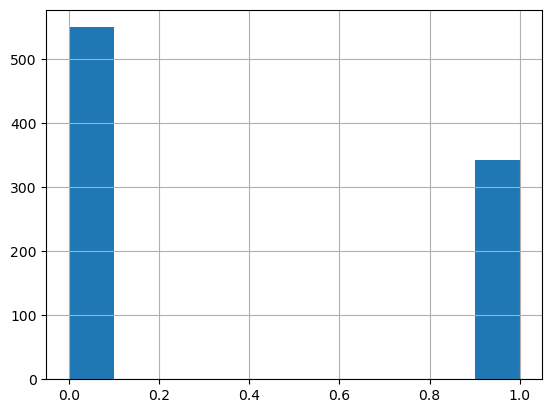

In [145]:
data["Survived"].hist()
plt.show()

### From the above that not many persons survived.

- Number of persons survived is `342`
- Number of persons that not survived is `549`

###  Discovering `Pclass` column

In [112]:
# show unique value

data["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [113]:
# output value count of each unique value

data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

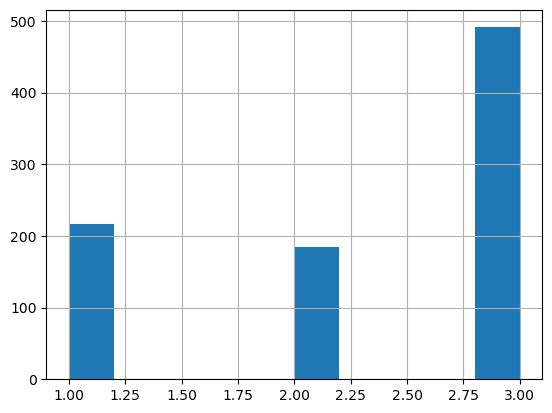

In [144]:
data["Pclass"].hist()
plt.show()

### From the above that many persons placed in  3rd class

- Number of persons in 1rd is `216`
- Number of persons in 2rd is `184`
- Number of persons in 3rd is `491`



###  Discovering `Sex` column

In [114]:
# show unique value

data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [115]:
# output value count of each unique value

data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

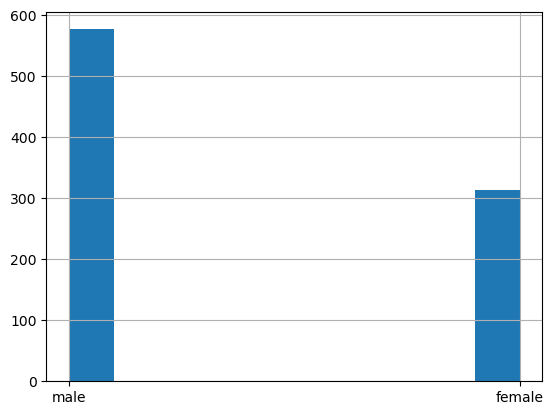

In [141]:
data["Sex"].hist()
plt.show()

### From the above that number of `male` much greater than `female`

- Numbre of male is `577`
- Number of female is `314`

### Discovering `Age`  column



In [116]:
# output number of nan value 

data["Age"].isna().sum()

177

In [117]:
# fill initial column with Title from name column

for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [118]:
# replace some value with other to avoid confoution

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                              ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                              inplace = True)

In [119]:
# fill nan value in age column

# 1- get unique value in initial column
titles = data["Initial"].unique()

# 2- grouped unique values 
group = data.groupby("Initial")

# 3- loop over titles list to get mean of values
for title in titles:
    data.loc[(data.Age.isna()) & (data.Initial == title),'Age'] = round(group.get_group(title)["Age"].mean())  

In [120]:
# make sure age column don't have nan value

data["Age"].isna().any()

False

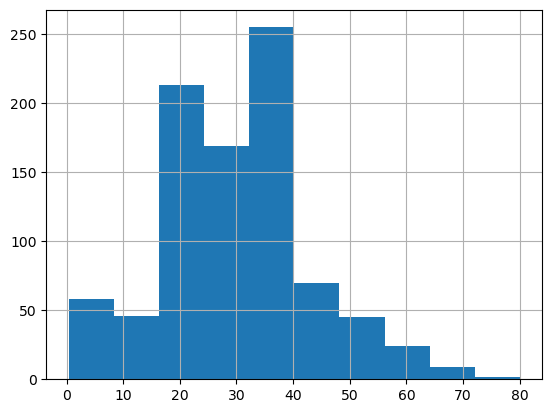

In [139]:
data["Age"].hist()
plt.show()

## From the above 

1- Column has `nan` value 
- Number of nan value is `177`
- I'm fill `Initial` column With titles from name column
- Column contain some values equal to same then we need to replace that to one value
- Fill nan value With `mean` of Age of each group in `Initial` column 

2- After `fixed` column

- Oldest person Survived is `80`
- Youngest person Survived is `0.24`
- Average person Survived is `29`

### Discovering `SibSp` and `Parch`  column



In [122]:
# show unique value of sibsp column 

data["SibSp"].unique()  

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [123]:
# output value count of sibsp column 

data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [124]:
# show unique value of parch column 

data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [125]:
# output value count of paech column 

data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

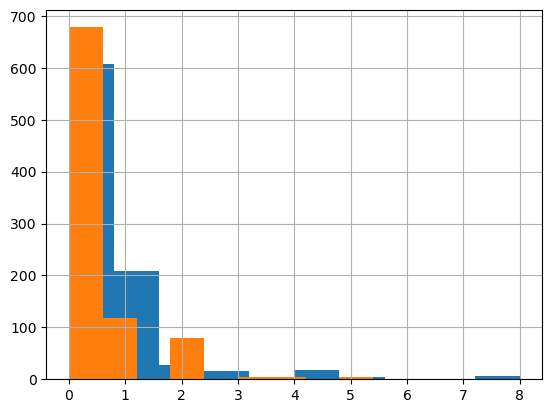

In [150]:
data["SibSp"].hist(); data["Parch"].hist()
plt.show()

## From the above 

1- SibSp column 
- Most persons without Siblings/Spouses

2- Parch column
- Most persons without Parents/Children



### Discovering `Embarked` column

In [126]:
# show nuique value 

data["Embarked"].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [127]:
# output number of nan value

data["Embarked"].isna().sum()

2

In [128]:
# fill nan value with mode 

data["Embarked"].fillna(data["Embarked"].mode()[0],inplace = True)

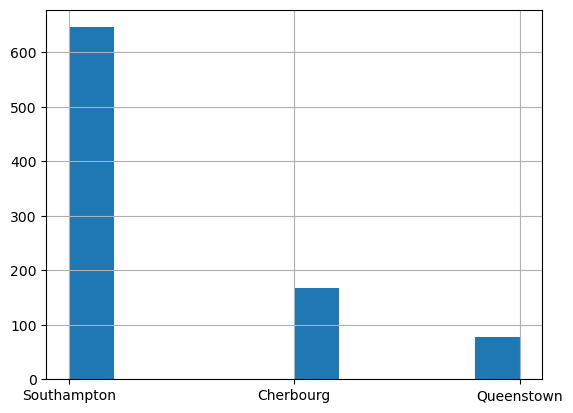

In [129]:
# show values count of each port 

data["Embarked"].hist()
plt.show()

### From the above

- Column contain 3 unique Embarkation ports
- Column contain nan values
- I'm fill nan value with mode

 Most persons Embark from `Southampton` port

### Discovering `Family_Size` column

In [130]:
# fill Family_Size with sum of Sibsp, Parch column

data["Family_Size"] = data["SibSp"] + data["Parch"]

In [131]:
# show unique value 

data["Family_Size"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [132]:
# output value count of each nuique value

data["Family_Size"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_Size, dtype: int64

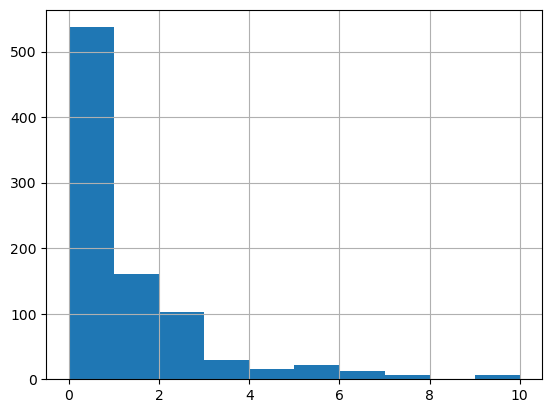

In [152]:
data["Family_Size"].hist()
plt.show()

### From the above 
- Most persons `alone` in this trip 
- largest number of family is `10`

## Exploratory Data Analysis

In [154]:
# output number of male,female ore survived

data.groupby(["Survived", "Sex"])[["Survived"]].count()

Survived
Survived Sex             
0        female        81
         male         468
1        female       233
         male         109

### From the above

1- Total number of male is `577`
- Male are survived `109`
- Male are not survived `468`

2- Total number of female is `314`
- Female are survived `233`
- Female are not survived `81`

#### 19 % of `male` or survived but 74 % of `female` are survived 

In [134]:
# output survived,not survived of each pclass

data.groupby(["Survived", "Pclass"])[["Survived"]].count()

Survived
Survived Pclass          
0        1             80
         2             97
         3            372
1        1            136
         2             87
         3            119

### From the above

- `63%` of persons in `1st` class are survived
- `47%` of persons in `2nd` class are survived
- `24%` of persons in `3rd` class are survived

#### 1st class more safety than other classes

In [135]:
data.groupby(["Survived", "Family_Size"])[["Survived"]].count()

Survived
Survived Family_Size          
0        0                 374
         1                  72
         2                  43
         3                   8
         4                  12
         5                  19
         6                   8
         7                   6
         10                  7
1        0                 163
         1                  89
         2                  59
         3                  21
         4                   3
         5                   3
         6                   4

### From the above

- Family_Size column is `inversely proportional` With `Survived` column 

- ### Death rate of persons `increases` when family size `increases`